In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:

data= pd.read_csv("austin_final.csv")
data.head()

,Unnamed: 0,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,0,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.68,10.0,7.0,2.0,20.0,4.0,31.0,0.46
1,1,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.13,10.0,10.0,5.0,16.0,6.0,25.0,0.00
2,2,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.49,10.0,10.0,10.0,8.0,3.0,12.0,0.00
3,3,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.45,10.0,10.0,7.0,12.0,4.0,20.0,0.00
4,4,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.33,10.0,10.0,7.0,10.0,2.0,16.0,0.00


In [3]:
X= data.drop(['PrecipitationSumInches','Unnamed: 0'], axis =1)
Y= data['PrecipitationSumInches']
Y= Y.values.reshape(-1,1)
clf= LinearRegression()
clf.fit(X,Y)
print(Y.shape)
print(X.shape)
print(type(Y))


(1319, 1)
(1319, 16)
<class 'numpy.ndarray'>


In [4]:
inp = np.array([[74], [60], [45], [67], [49], [43], [33], [45],
                [57], [29.68], [10], [7], [2], [20], [4], [31]])
inp = inp.reshape(1, -1)
print('The predicted precipitation in inches for the input is:', clf.predict(inp))

The predicted precipitation in inches for the input is: [[1.00451972]]


the precipitation trend graph: 


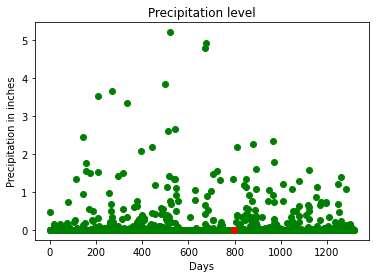

Precipitation vs selected attributes graph: 


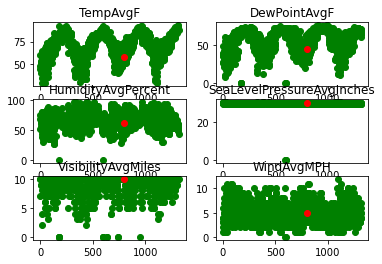

In [5]:
#code for the precipitation trend graph
print("the precipitation trend graph: ")
day_index = 798
days = [i for i in range(Y.size)]
plt.scatter(days, Y, color = 'g')
plt.scatter(days[day_index], Y[day_index], color ='r')
plt.title("Precipitation level")
plt.xlabel("Days")
plt.ylabel("Precipitation in inches")
plt.show()

#code for Precipitation vs selected attributes graph
print("Precipitation vs selected attributes graph: ")
x_vis = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent',
                  'SeaLevelPressureAvgInches', 'VisibilityAvgMiles',
                  'WindAvgMPH'], axis = 1)
  
for i in range(x_vis.columns.size):
    plt.subplot(3, 2, i + 1)
    plt.scatter(days, x_vis[x_vis.columns.values[i][:100]],
                                               color = 'g')
  
    plt.scatter(days[day_index], 
                x_vis[x_vis.columns.values[i]][day_index],
                color ='r')
  
    plt.title(x_vis.columns.values[i])
  
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)
lm2 = LinearRegression()

lm2.fit(X_train, y_train)

y_pred = lm2.predict(X_test)

print("root mean squared error is",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("mean absolute error is",metrics.mean_absolute_error(y_test, y_pred))


root mean squared error is 0.3446711272677297
mean absolute error is 0.1797577339468312


red dots show predicted rainfall, green dots show real rainfall


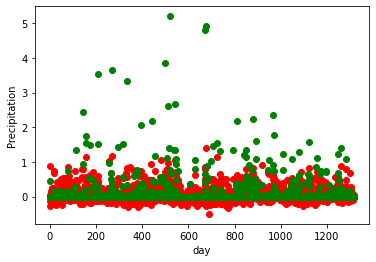

In [7]:
Y_for = lm2.predict(X)
Y_real = Y
print("red dots show predicted rainfall, green dots show real rainfall")
fig, ax = plt.subplots()
ax.scatter(days, Y_for, color = 'r')
ax.scatter(days, Y, color ='g' )
ax.set_xlabel('day')
ax.set_ylabel('Precipitation')
plt.show()
